**Анализ данных по магазину «Стримчик»**

**Шаг 1. Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План работы:**

**Шаг 1.** 
Откроем файл с данными и изучим общую информацию

Путь к файлу: /datasets/games.csv.

**Шаг 2.** 
- Подготовим данные

- Заменим названия столбцов (приведем к нижнему регистру);

- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

- Обработаем пропуски при необходимости:

- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;

- Опишем причины, которые могли привести к пропускам;

- Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;

- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**Шаг 3.** 

Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитываем работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесем выводы с продажами игр на других платформах.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4.** С
оставим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5.** 
Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясним:
Как сформулировали нулевую и альтернативную гипотезы;

Какой критерий применил для проверки гипотез и почему.

**Шаг 6.** Общий вывод



**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
# установка необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
# откройтие файла с данными

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

 ##### **Изучение общей информации**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.columns # столбцы

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


##### Вывод по исследуемым данным
Столбцы записаны в неверном регистре, есть значения NaN у некоторых столбцов, также следует привести к правильному типу данных.

**Шаг 2. Предобработка данных**

In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

*Пропуски есть в стлобцах:*

Name, Year_of_Release, Critic_Score, User_Score, Rating

*Пропуски могли появиться по многим причинам, например:* пользователи и критики могли попросту не дать оценку игре по причинам недоступности данной игры в их регионе или потому что она не популярная, рейтинг от организации ESRB мог быть не дан по множествам причин (например не подходит по критериям для оценки) или же просто технические ошибки, наличие двух пропусков в поле name и genre больше всего похоже на техническую ошибку.

In [8]:
# Замена названия столбцов (приведение к нижнему регистру) 
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#Замена пропущенных значений на пустые строки для удобства работы. Пока логично заменить поля name и genre.
data.fillna({"name" : " ", "genre" : " "}, inplace=True)

In [10]:
#TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
#То есть, данные были не заполнены специально, так как решения о рейтинге не было. Следует заменить tbd на Nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [11]:
# Приведение годов и оценок критиков к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype(float)

In [12]:
data['rating'] = data['rating'].fillna('Unknown')

In [13]:
#Отдельный столбец с суммой продаж по всем регионам 'full_sales'
data['full_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:**

Предварительно можно утверждать, что полноты предоставленных данных достаточно для проведения анализа.

Обнаружены проблемы:

В нескольких столбцах пропущены значения;

Названия столбцов не приведены к правильному (нижнему) регистру;

Неправильный тип данных в нескольких столбцах.

**Шаг 3. Исследовательский анализ данных**

*Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

Text(0, 0.5, 'Количество игр')

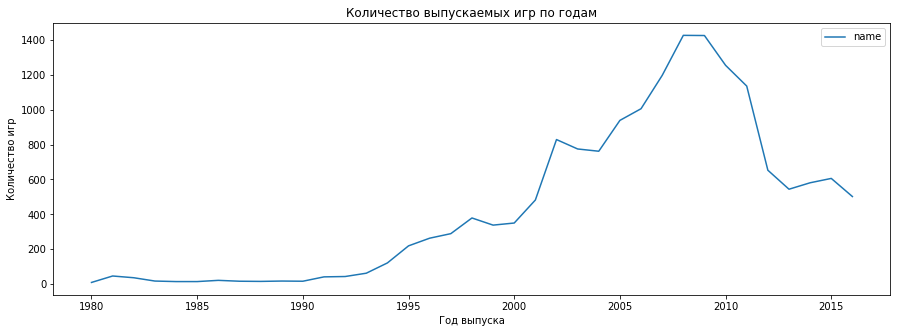

In [14]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15, 5))
sns.lineplot(data=games)
plt.title("Количество выпускаемых игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")

По графику можно сказать, что количество игр на консоли и компьютеры начало активно расти в конце 90 с активным ростом до 2007-2008 года. Обосновать тенденцию к снижению количества компьютерных игр можно обосновать развитием мобильных игр и других альтернатив приставкам.

*Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

Text(0, 0.5, 'Количество продаж')

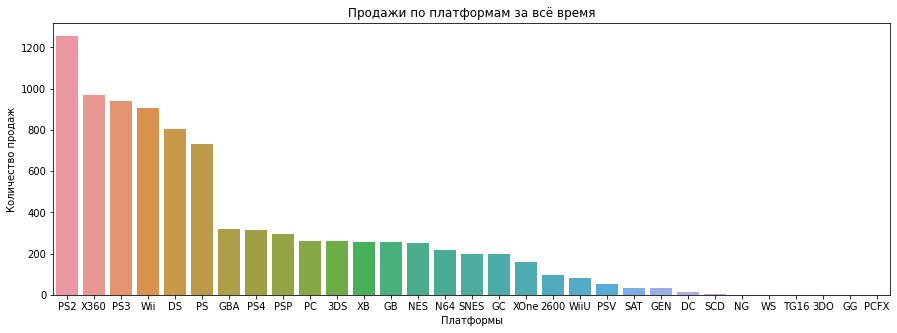

In [15]:
platform_sales = data.pivot_table(
    index='platform', values='full_sales', aggfunc='sum').sort_values(by='full_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=platform_sales.index,y=platform_sales['full_sales'])
plt.title("Продажи по платформам за всё время")
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")

<Figure size 1440x720 with 0 Axes>

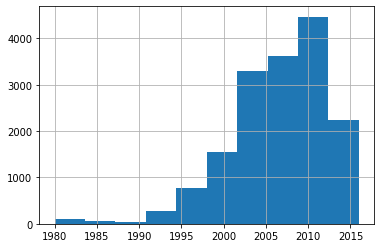

<Figure size 1440x720 with 0 Axes>

In [16]:
data['year_of_release'].hist(bins=10)
plt.figure(figsize=(20, 10))

Cамые популярные игровые платформы за всё время это PS2, X360, PS3, WII, DS, PS

**Факт:**
оригинальная, первая Playstation (PS) была выпущена компанией Sony 29 лет назад, в декабре 1994 года.
Новая версия игровой приставки была выпущена спустя шесть лет после выхода первой (такая периодичность, 6—7 лет, сохраняется до сих пор). Продажи начались в марте 2000 года, производство завершилось только в январе 2013 года. 

Считается, что Playstation смогла выиграть гонку с конкурентами в том числе благодаря относительно низкой стоимости приставки и, что даже более важно, благодаря сотрудничеству со сторонними разработчиками игр — Nintendo и Sega акцентировали внимание на собственном производстве видеоигр.

*Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.* **Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [17]:
# Создание таблицы с актуальными данными
actual_data = data.query('year_of_release >= 2014')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Время жизнь консоли (поколения консоли) около 7-10 лет, поэтому, для более точного прогноза данных на 2017 год отсеем всё до 2014 года.

*Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*

In [18]:
actual_data['platform'].unique() # список уникальных платформ

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [19]:
# Продажи по этим платформам за актуальный период
actual_platforms = actual_data.pivot_table(
                                 index = ['platform'], 
                                 values = ['full_sales'],
                                 aggfunc =  ['sum'])

actual_platforms.sort_values(('sum', 'full_sales'), ascending = False)

,sum
,full_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40


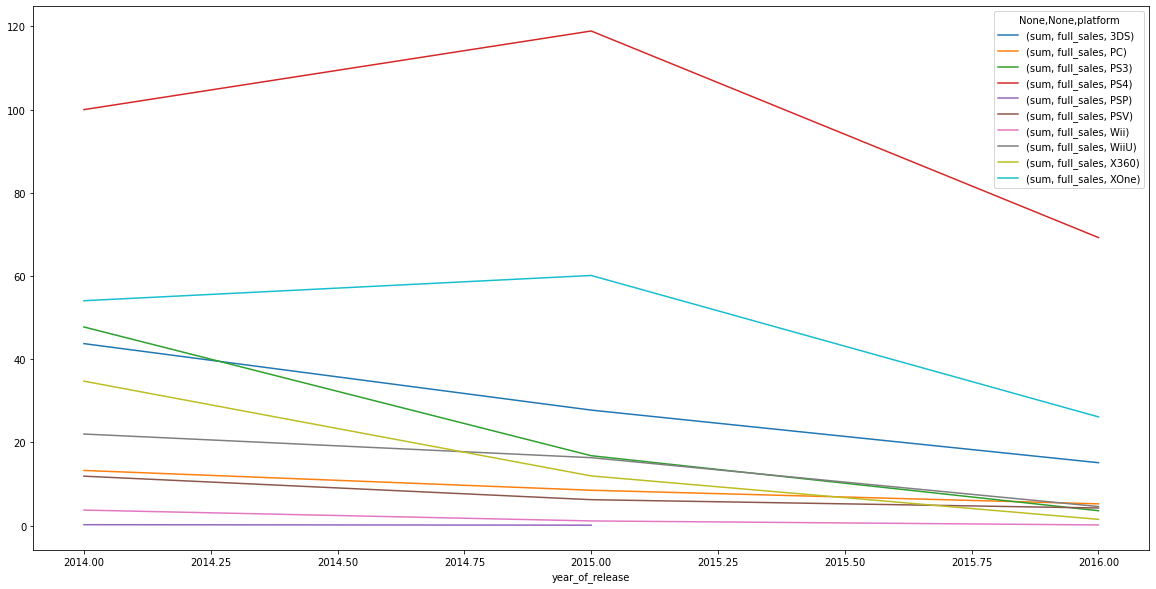

In [20]:
platforms_actual_data = actual_data.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['full_sales'],
                                 aggfunc =  ['sum'])
platforms_actual_data.plot(figsize = (20,10))
plt.show()

Очевидный лидер - PS4. Потенциально прибыльной консолью считаю только PS4 (на 2017 год когда PS5 еще не анонсирована).
XOne на втором месте.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

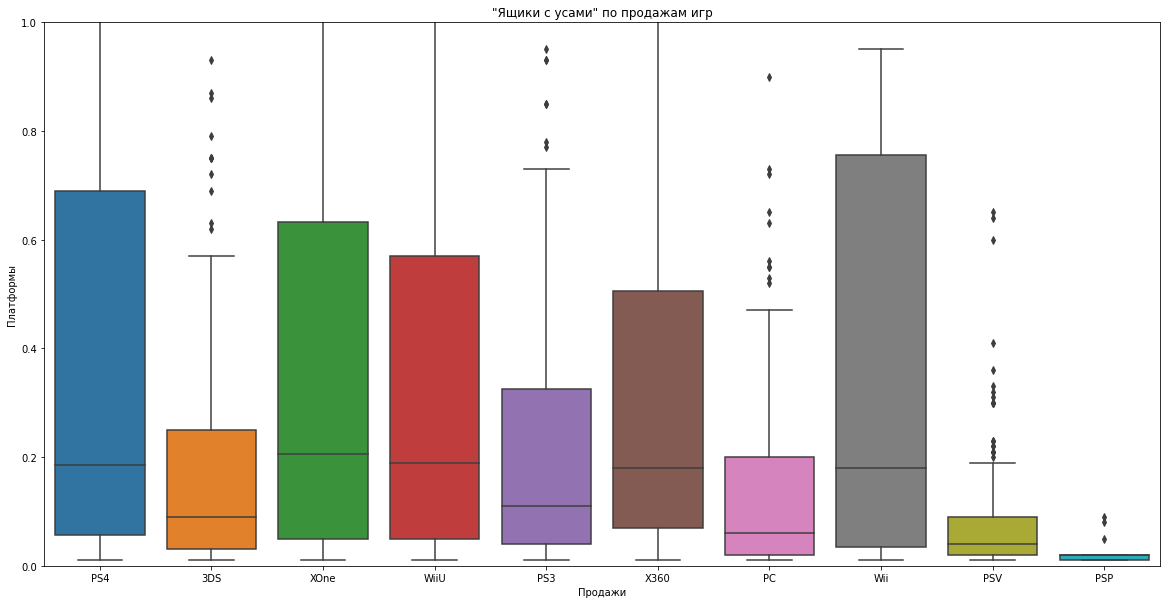

In [21]:
plt.figure(figsize=(20, 10))

sns.boxplot(data = actual_data, x='platform', y='full_sales')

plt.ylim(0, 1)

plt.title('"Ящики с усами" по продажам игр')
plt.xlabel('Продажи')
plt.ylabel('Платформы')

plt.show()

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [22]:
ps4_data = actual_data.query('platform == "PS4"')
ps4_data = ps4_data.sort_values('user_score', ascending = False)

Text(0.5, 1.0, 'Влияние отзывов пользователей на продажи')

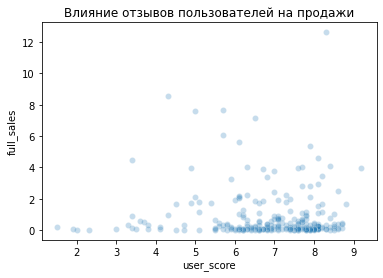

In [23]:
ps4_score_users = sns.scatterplot(data = ps4_data, x = 'user_score', y = 'full_sales', alpha=0.25)
plt.title('Влияние отзывов пользователей на продажи')

Text(0.5, 1.0, 'Влияние отзывов критиков на продажи')

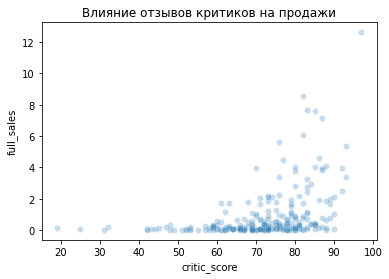

In [24]:
ps4_score_critic = sns.scatterplot(data = ps4_data, x = 'critic_score', y = 'full_sales', alpha=0.25)
plt.title('Влияние отзывов критиков на продажи')

In [25]:
ps4_data['user_score'].corr(ps4_data['full_sales'])

-0.040131589472697356

Оценки пользователей не влияют на продажи. Коэффициент корреляции почти равен 0.

In [26]:
ps4_data['critic_score'].corr(ps4_data['full_sales'])

0.4026614106810408

Между объёмом продаж и оценками критиков наблюдается слабая прямая корреляция.

*Соотнесите выводы с продажами игр на других платформах.*

In [27]:
x360_df = actual_data.query('platform == "X360"')
x360_df = x360_df.sort_values('user_score', ascending = False)

print(x360_df['user_score'].corr(x360_df['full_sales']))
print(x360_df['critic_score'].corr(x360_df['full_sales']))

-0.13844457094566504
0.5257228356581523


Ситуация схожая. Оценки пользователей едва влияют. Критики своими хорошими отзывами немного повышают продажи, но говорить о прямой зависимости нельзя.

*Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

In [28]:
actual_data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [29]:
(actual_data.pivot_table(index='genre', values='full_sales', aggfunc='sum').sort_values('full_sales', ascending=False))

,full_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [30]:
actual_data.groupby('genre')['full_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


После анализа средних значений можно увидеть, что: лидирующий жанр с большим отрывом от конкурентов является Shooter.

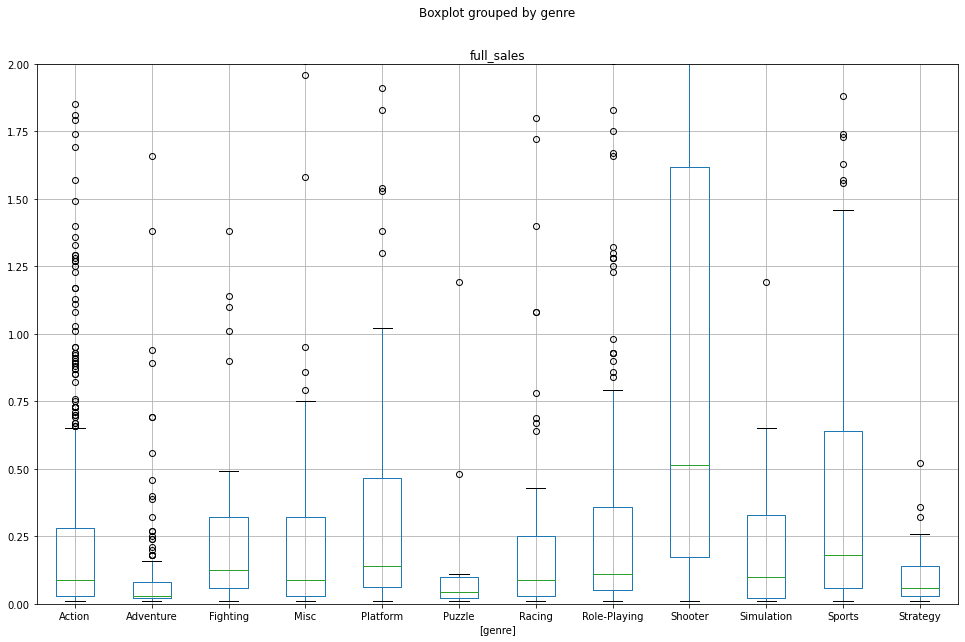

In [31]:
actual_data.boxplot(column = ['full_sales'],by = ['genre'], figsize=(16, 10))
plt.ylim((0, 2))
plt.show()

**Вывод:**
В жанре Action много выбросов, из-за этого общая прибыль по жанру Action выше остальных. Но медианное значение продаж выше в жанре Shooter. Второе место по медианным продажам у Sports, третье - Platform.
Лидер - action, минимальные продажи у стратегий и пазлов (не удивительно).

Очевидный лидер по потенциальному росту - PS4. Потенциально прибыльной консолью считаю только PS4 (на 2017 год когда PS5 еще не анонсирована).
XOne на втором месте.

**Шаг 4. Составление портрета пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

2. Самые популярные жанры (топ-5). Поясните разницу.

3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

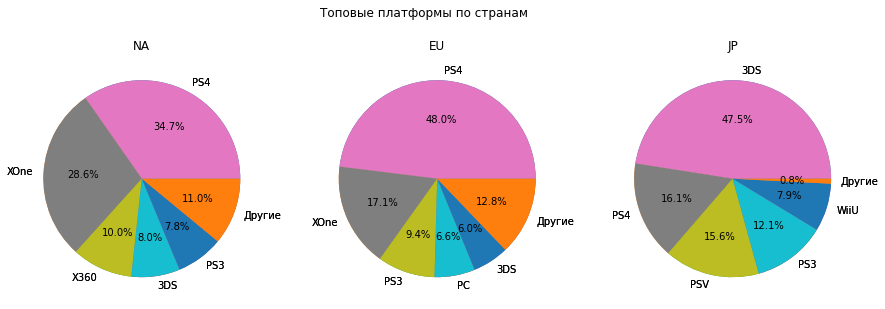

In [32]:
# Круговая диаграмма для каждого региона

regions = actual_data.columns[4:7] # Берем регионы

figure, axs = plt.subplots(1, 3, figsize=(15, 5))
figure.suptitle('Топовые платформы по странам')
for i in range(3):
  # 5 самых продающих платформ
    data_best_platforms = (actual_data.groupby('platform')[regions[i]].sum().reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).head(5))
  # Отнесем остальные продажи к "другие"
    data_best_platforms = data_best_platforms.append({'platform': 'Другие', regions[i]: actual_data[regions[i]].sum() - data_best_platforms[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['platform'])
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['platform'], autopct='%1.1f%%')

    axs[i].set_title(data_best_platforms.columns[1].split('_')[0].upper())
plt.show()

В Северной Америке и Европе выбор платформ похож, в Японии - выбор приставок абсолютно другой.
В Северной Америке у юзеров два явных лидера: PS4 и XOne.
В Европе явное предпочтение отдаётся PS4.
В Японии самыми популярными оказались платформы Nintendo.

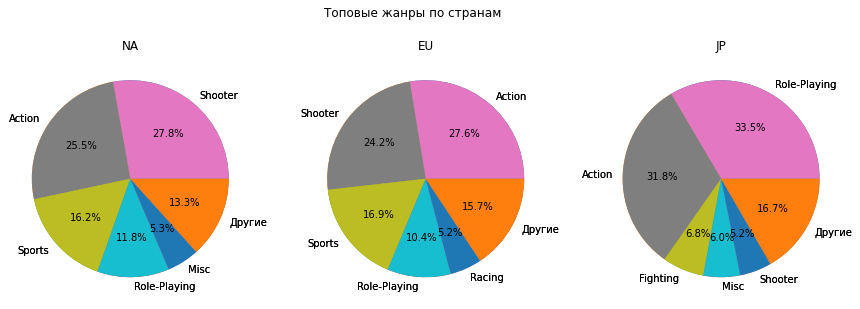

In [33]:
figure, axs = plt.subplots(1, 3, figsize=(15, 5))
figure.suptitle('Топовые жанры по странам')
for i in range(3):
  # 5 самых продающих платформ
    data_best_platforms = (actual_data.groupby('genre')[regions[i]].sum().reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).head(5))
  # Отнесем остальные продажи к "другие"
    data_best_platforms = data_best_platforms.append({'genre': 'Другие', regions[i]: actual_data[regions[i]].sum() - data_best_platforms[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['genre'])
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['genre'], autopct='%1.1f%%')

    axs[i].set_title(data_best_platforms.columns[1].split('_')[0].upper())
plt.show()

Предпочтения в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры в топе. В Северной Америке больше играют в ролевые игры, в Европе любят гонки.

В Японии вкус совершенно иной - на первом месте с большим отрывом ролевые игры. Далее экшны и файтинги.

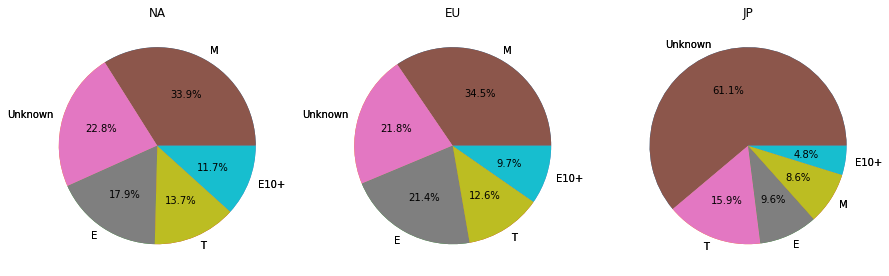

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    data_best_platforms = (actual_data.groupby('rating')[regions[i]].sum().reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).head(5))
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['rating'])
    axs[i].pie(data_best_platforms[regions[i]], labels = data_best_platforms['rating'], autopct='%1.1f%%')
    axs[i].set_title(data_best_platforms.columns[1].split('_')[0].upper())
plt.show()

В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи не прослеживается.
В Японии у самых популярных платформ отсутствует рейтинг. 

**Вывод:**

В Северной Америке и Европе выбор платформ похож, в Японии - выбор приставок абсолютно другой.
В Северной Америке у юзеров два явных лидера: PS4 и XOne.
В Европе явное предпочтение отдаётся PS4.
В Японии самыми популярными оказались платформы Nintendo.

Предпочтения в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры в топе. В Северной Америке больше играют в ролевые игры, в Европе любят гонки.

В Японии вкус совершенно иной - на первом месте с большим отрывом ролевые игры. Далее экшны и файтинги.

В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи не прослеживается.
В Японии у самых популярных платформ отсутствует рейтинг. 

**Шаг 5. Проверьте гипотезы**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [35]:
alpha = .01

results = st.ttest_ind(
    actual_data[actual_data['platform'] == 'PC']['user_score'].dropna(), 
    actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [36]:
actual_data[actual_data['platform'] == 'PC']['user_score'].mean()

6.298360655737704

Средний рейтинг пользователя для PC

In [37]:
actual_data[actual_data['platform'] == 'XOne']['user_score'].mean()

6.594545454545454

Средний рейтинг пользователя для XOne

Тест не позволяет нам отвергнуть нулевую гипотезу.

In [38]:
alpha = .01

results = st.ttest_ind(
    actual_data[actual_data['genre'] == 'Action']['user_score'].dropna(), 
    actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Тест позволяет отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются

**Общий вывод**

Количество игр на консоли и компьютеры начало активно расти в конце 90 с активным ростом до 2007-2008 года. Обосновать тенденцию к снижению количества компьютерных игр можно обосновать развитием мобильных игр и других альтернатив приставкам.

Cамые популярные игровые платформы за всё время это PS2, X360, PS3, WII, DS, PS

Факт: оригинальная, первая Playstation (PS) была выпущена компанией Sony 29 лет назад, в декабре 1994 года. Новая версия игровой приставки была выпущена спустя шесть лет после выхода первой (такая периодичность, 6—7 лет, сохраняется до сих пор). Продажи начались в марте 2000 года, производство завершилось только в январе 2013 года.

Считается, что Playstation смогла выиграть гонку с конкурентами в том числе благодаря относительно низкой стоимости приставки и, что даже более важно, благодаря сотрудничеству со сторонними разработчиками игр — Nintendo и Sega акцентировали внимание на собственном производстве видеоигр.

Время жизнь консоли (поколения консоли) около 7-10 лет, поэтому, для более точного прогноза данных на 2017 год отсеем всё до 2014 года.

Лидер в продажах по жанрам - action, минимальные продажи у стратегий и пазлов (не удивительно).

В Северной Америке и Европе выбор платформ похож, в Японии - выбор приставок абсолютно другой. В Северной Америке у юзеров два явных лидера: PS4 и XOne. В Европе явное предпочтение отдаётся PS4. В Японии самыми популярными оказались платформы Nintendo.

Предпочтения в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры в топе. В Северной Америке больше играют в ролевые игры, в Европе любят гонки.

В Японии вкус совершенно иной - на первом месте с большим отрывом ролевые игры. Далее экшны и файтинги.

В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи не прослеживается.
В Японии у самых популярных платформ рейтинг T.


Проверка гипотез:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: проведённый статистический тест не позволяет нам отвергнуть нулевую гипотезу. 
Средние пользовательские рейтинги жанров Action и Sports разные: проведённый статистический тест позволяет отвергнуть нулевую гипотезу.

**Как были предобработаны данные:**

1. Заменил названия столбцов (привел к нижнему регистру); 

2. Преобразовал данные в правильные типы.

3. Обработал пропуски там где это требовалось; 

4. Расскрыты причины заполнения пропусков и причины почему этого делать не стоит;

5. Описал причины, которые могли привести к пропускам;

6. Разобрано понятие 'tbd' в столбце с оценкой пользователей. Отдельно разобрал это значение и описал, как его обработал; 

7. Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

**Основные выводы:**

Потенциально прибыльные платформы:
PS4 и XOne

Самыми прибыльными жанрами являются шутеры и экшены. 

Самые популярные жанры:
Шутеры, Экшены, Спортивные игры, Ролевые игры, Гонки

